In [1]:
import pandas as pd
import geopandas as gpd
import json
import matplotlib.pyplot as plt

## data file

In [3]:
df = pd.read_csv('data/firmeninformationen.csv')

In [4]:
df.shape

(401, 34)

In [5]:
df.head(1)

,_id,id,ags2,bundesland,ags5,kreis,kr_firm,kr_firm_br_a,kr_firm_br_b,kr_firm_br_c,...,kr_firm_br_r,kr_firm_br_s,kr_firm_br_t,kr_firm_br_u,kr_firm_br_99,kr_firm_be_kl1,kr_firm_be_kl2,kr_firm_be_kl3,kr_firm_be_kl4,kr_firm_be_kl99
0,1,1,1,Schleswig-Holstein,1001,"Flensburg, Stadt",5078,15,0,194,...,126,760,0,0,169,2396,1284,116,12,1270


In [6]:
# fix ags5 code to be len=5, add 0 at front
# df['ags5'] = gdf['krs_code']
def fix_ags5(x):
    if len(str(x))==4:
        return '0'+str(x)
    else:
        return str(x)
df['ags5_fix'] = df['ags5'].apply(fix_ags5)

## geo file

### shapefile

In [7]:
gdf = gpd.read_file('georef-germany-kreis/georef-germany-kreis-millesime.shp')

In [8]:
gdf.shape

(401, 9)

In [9]:
gdf.head(1)

,year,lan_code,lan_name,krs_code,krs_name,krs_area_co,krs_type,krs_name_sh,geometry
0,2020,08,Baden-WÃ¼rttemberg,08211,Stadtkreis Baden-Baden,DEU,Stadtkreis,Baden-Baden,"MULTIPOLYGON (((8.15840 48.84665, 8.15952 48.8..."


<AxesSubplot:>

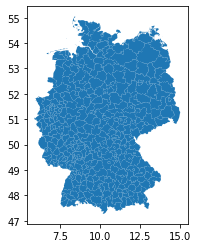

In [10]:
gdf.plot()

### json file

In [11]:
with open('georef-germany-kreis/georef-germany-kreis.json') as response:
    gjs = json.load(response)

In [13]:
merged = pd.merge(df, gdf, left_on='ags5_fix', right_on='krs_code')

In [14]:
merged = merged[['ags2', 'bundesland', 'ags5_fix', 'kreis', 'kr_firm',
       'kr_firm_br_a', 'kr_firm_br_b', 'kr_firm_br_c', 'kr_firm_br_d',
       'kr_firm_br_e', 'kr_firm_br_f', 'kr_firm_br_g', 'kr_firm_br_h',
       'kr_firm_br_i', 'kr_firm_br_j', 'kr_firm_br_k', 'kr_firm_br_l',
       'kr_firm_br_m', 'kr_firm_br_n', 'kr_firm_br_o', 'kr_firm_br_p',
       'kr_firm_br_q', 'kr_firm_br_r', 'kr_firm_br_s', 'kr_firm_br_t',
       'kr_firm_br_u', 'kr_firm_br_99', 'kr_firm_be_kl1', 'kr_firm_be_kl2',
       'kr_firm_be_kl3', 'kr_firm_be_kl4', 'kr_firm_be_kl99', 'year', 
       'lan_code', 'lan_name', 'krs_code', 'krs_name', 'krs_area_co',
       'krs_type', 'krs_name_sh', 'geometry']]

In [15]:
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

In [16]:
merged['longitude'] = merged['coords'].str[0]
merged['latitude'] = merged['coords'].str[1]

In [17]:
merged = gpd.GeoDataFrame(merged)

In [18]:
merged_json = json.loads(merged.to_json(), default_handler=str)
json_data = json.dumps(merged_json)